In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import datetime

In [ ]:

un_emp=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
un_emp

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
un_emp.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
un_emp=un_emp.rename(columns={' Date':'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'})

In [ ]:
un_emp['Frequency'].unique()

array([' M'], dtype=object)

In [ ]:
un_emp=un_emp.drop(['latitude','longitude','Frequency'],axis=1)

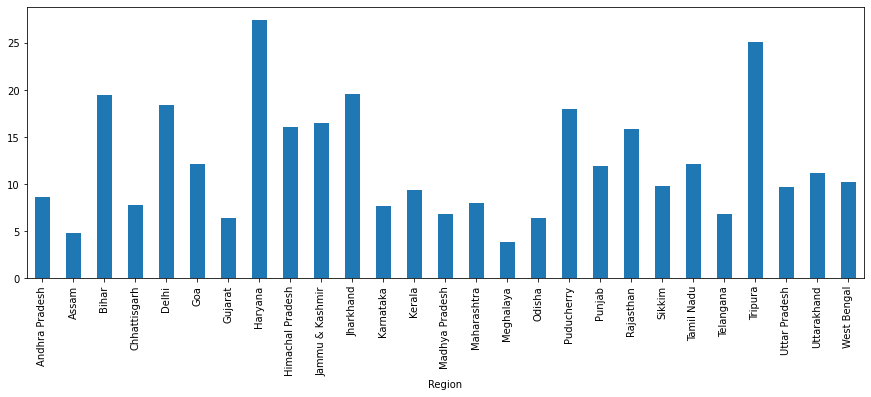

In [ ]:
plt.figure(figsize=(15,5))
un_emp.groupby('Region')['Estimated Unemployment Rate (%)'].agg('mean').plot(kind='bar')

from the above plot we say that maximum percentage of unemployment is in Haryana and the least is in Meghalaya

In [ ]:
un_emp['Month_Year'] = pd.to_datetime(un_emp['Date']).apply(lambda x: x.strftime('%B-%Y')) 

In [ ]:
un_emp

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Month_Year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,January-2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,February-2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,March-2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,April-2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,May-2020
...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,7.29,30726310,40.39,East,June-2020
263,West Bengal,31-07-2020,6.83,35372506,46.17,East,July-2020
264,West Bengal,31-08-2020,14.87,33298644,47.48,East,August-2020
265,West Bengal,30-09-2020,9.35,35707239,47.73,East,September-2020


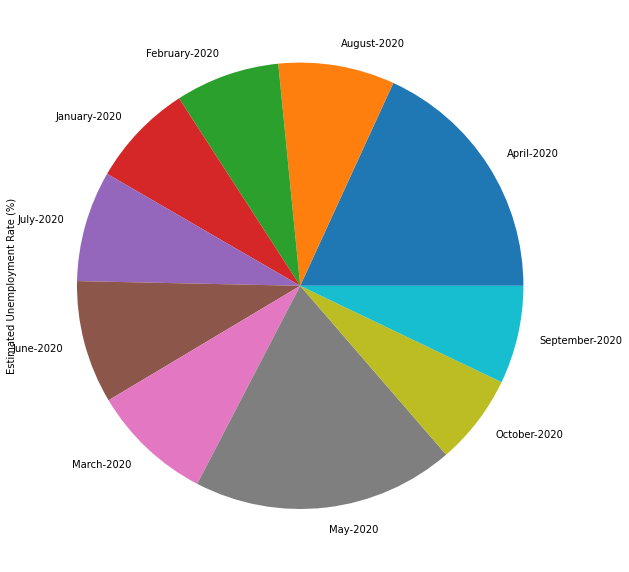

In [ ]:
plt.figure(figsize=(10,15))
pie=un_emp.groupby('Month_Year')['Estimated Unemployment Rate (%)'].agg('mean').plot(kind='pie')

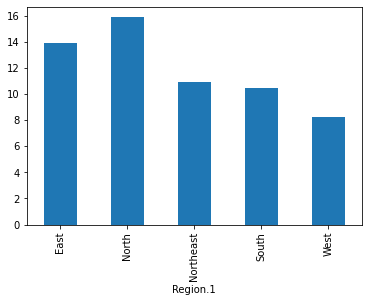

In [ ]:
un_emp.groupby('Region.1')['Estimated Unemployment Rate (%)'].agg('mean').plot(kind='bar')


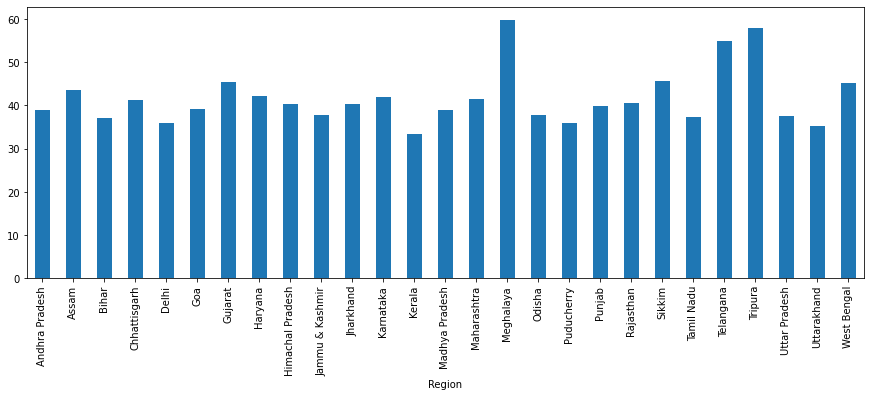

In [ ]:
plt.figure(figsize=(15,5))
un_emp.groupby('Region')['Estimated Labour Participation Rate (%)'].agg('mean').plot(kind='bar')


Meghalaya have highest labour participation rate 
almost all the states have labour participation rate above 30%
 

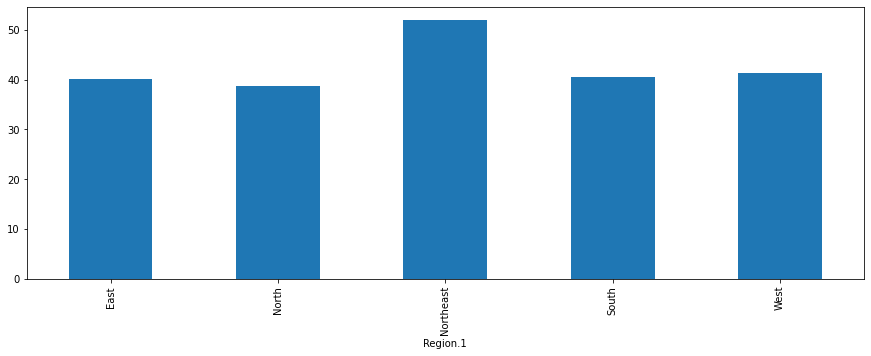

In [ ]:
plt.figure(figsize=(15,5))
un_emp.groupby('Region.1')['Estimated Labour Participation Rate (%)'].agg('mean').plot(kind='bar')

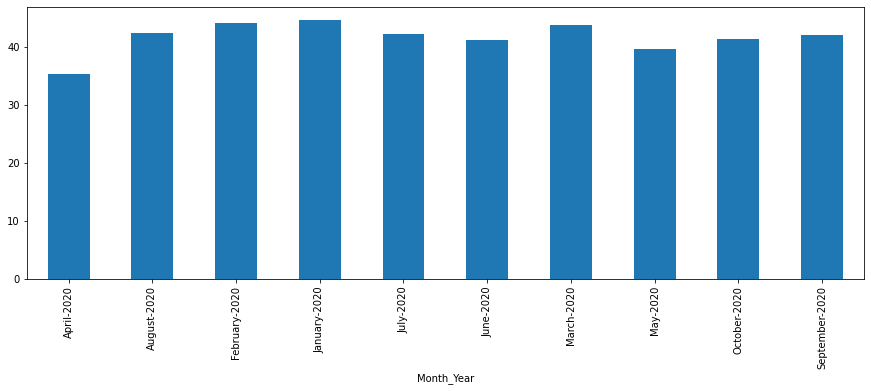

In [ ]:
plt.figure(figsize=(15,5))
un_emp.groupby('Month_Year')['Estimated Labour Participation Rate (%)'].agg('mean').plot(kind='bar')

we can see that in every month the labour participation rate is nearly same
avg labour participation rate is nearly 40% every month

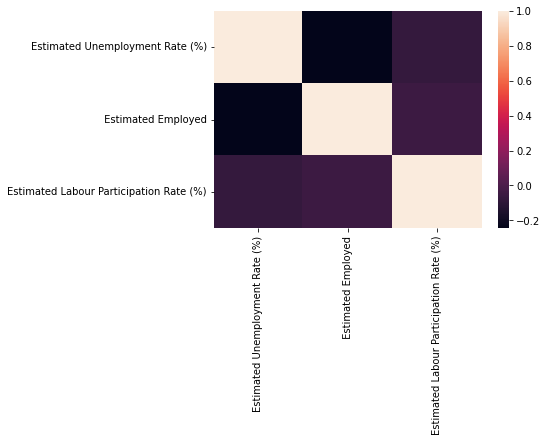

In [ ]:
sns.heatmap(un_emp.corr())

this is a heatmap which shows the correalation between the features which have continous data.
we can estimate that none of the features are highly realted to each other


From the above estimations we can concule that :

-Highly devloped states have less unemploment rate
-In the month of May and April the unemployment rate was maximum
-Labour Paarticipation rate for developed states is between 30-40%
-also the northern region of every state have high labour paryticipation rate 